In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [6]:
train = pd.read_csv("D:\Dataset\wesad-chest-combined-classification-hrv.csv")
test = pd.read_csv("D:\Dataset\wesad-chest-combined-classification-hrv.csv")

In [7]:
train

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,0,1,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,0,0,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,1,1,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,2,0,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,5,2,2,2,2
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,1.184777e+06,0.057490,0.061358,3.873768,0.028697,13,2,1,1,2
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,10,2,0,0,2
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,5,0,2,2,0


In [8]:
test

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ class,SSSQ Label,condition label
0,660.756625,657.242305,34.857082,7.408307,7.408129,4.705134,91.050077,1.75,0.00,5.244915,...,1.092856e+07,0.134410,0.249678,7.068440,0.033515,13,0,1,1,0
1,762.004543,769.028815,106.035926,13.591780,13.580221,7.801475,80.267696,6.00,1.00,9.614723,...,-1.039564e+06,0.125816,0.067484,5.971604,0.003921,9,0,0,0,0
2,978.587122,973.028365,80.323113,20.318045,20.316451,3.953289,61.720802,20.50,1.50,14.383937,...,-3.073518e+06,0.069888,0.038281,10.945519,0.003154,4,1,1,1,1
3,690.333891,669.548460,79.677822,15.173680,15.173087,5.251055,87.996270,8.75,1.50,10.742463,...,-4.341078e+06,0.094345,0.074014,2.435759,0.009692,8,2,0,0,2
4,724.270331,721.597785,71.663062,13.580379,13.580370,5.276956,83.637107,5.00,0.75,9.614828,...,1.311140e+07,0.076385,0.063323,3.259253,0.014438,4,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,626.514447,611.246385,50.848737,5.969682,5.938417,8.517829,96.341521,0.00,0.00,4.204367,...,-7.113930e+05,0.271071,0.363785,24.633242,0.006019,5,2,2,2,2
135646,628.974014,620.689235,64.127172,12.297019,12.293382,5.214855,96.344181,5.00,0.25,8.703647,...,1.184777e+06,0.057490,0.061358,3.873768,0.028697,13,2,1,1,2
135647,589.926708,581.814135,51.445399,11.549705,11.541521,4.454261,102.423931,3.25,0.25,8.171334,...,-8.792667e+05,0.107559,0.152385,2.082405,0.121886,10,2,0,0,2
135648,924.373882,930.926635,88.692462,11.467998,11.467912,7.733910,65.529308,5.50,0.00,8.119220,...,-8.005780e+06,0.333801,0.174757,6.849003,0.002597,5,0,2,2,0


In [9]:
train['condition'].unique()

array([0, 1, 2], dtype=int64)

<BarContainer object of 3 artists>

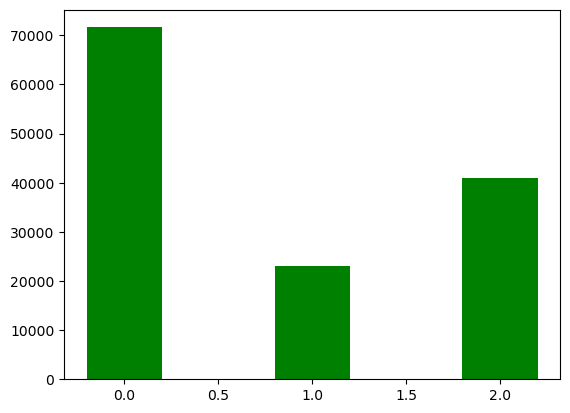

In [10]:
conditions = dict(train['condition'].value_counts())
labels = list(conditions.keys())
counts = list(conditions.values())
plt.bar(labels,counts, color ='green',
        width = 0.4)

In [11]:
le = preprocessing.LabelEncoder()
le.fit(train['condition'])
train['condition'] = le.transform(train['condition'])
test['condition'] = le.transform(test['condition'])

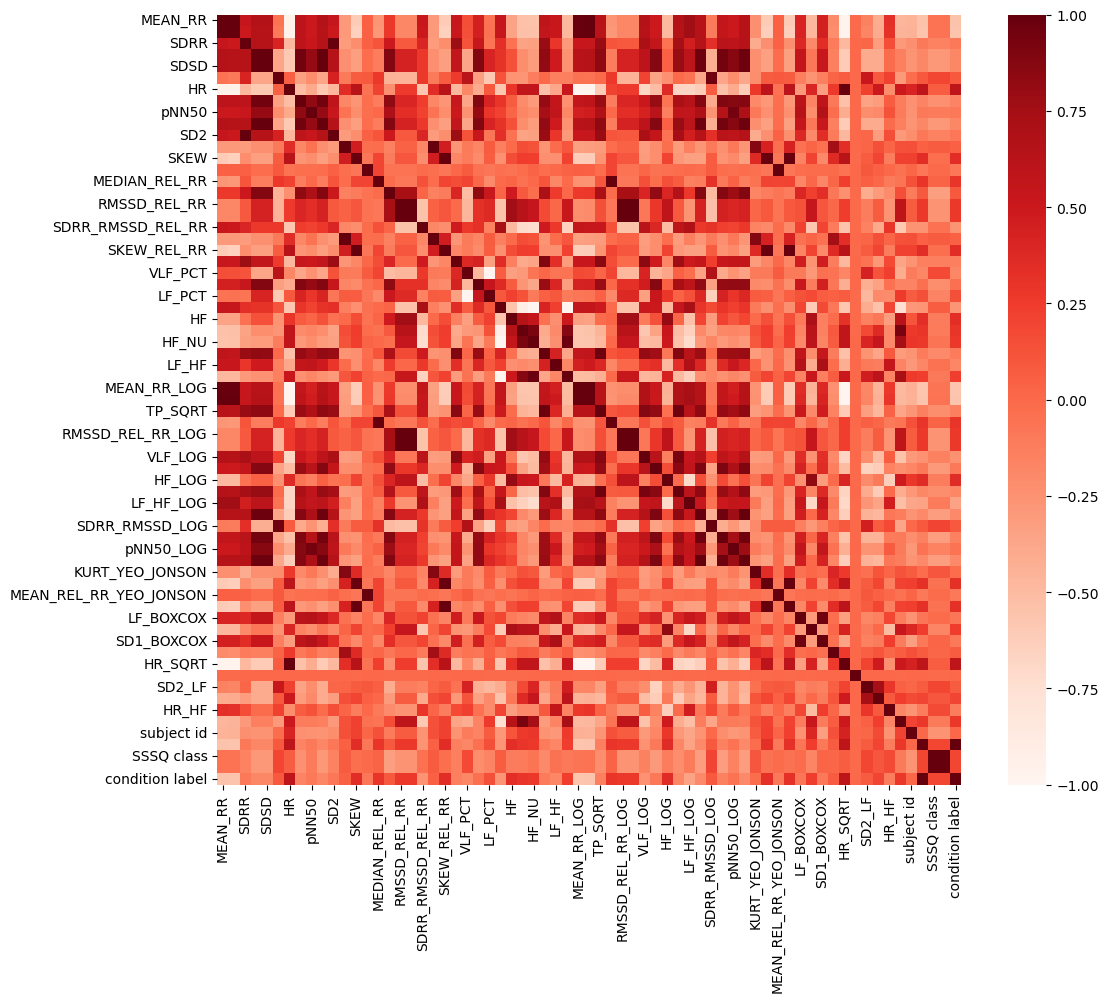

In [12]:
plt.figure(figsize=(12,10))
corr = train.corr()
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

In [13]:
def feature_selection(correlation,threshold):
    selected_features = []
    for i in range(corr.shape[0]):
      if corr.iloc[i,35] > threshold:
        selected_features.append(train.iloc[:,i])
    return pd.DataFrame(selected_features).T

In [14]:
CORRELATION_THRESHOLD = 0.1
reduced_train = feature_selection(corr,CORRELATION_THRESHOLD)

In [15]:
reduced_train

,SDRR,SDRR_RMSSD,HR,SD2,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,SKEW_REL_RR,VLF,...,VLF_LOG,HF_LOG,SDRR_RMSSD_LOG,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,HR_SQRT,subject id,condition,condition label
0,34.857082,4.705134,91.050077,49.015540,0.773100,0.000061,0.000077,1.973185,0.773100,384.337244,...,5.954119,2.630536,1.741367,0.869302,0.000060,0.869302,9.542016,13.0,0.0,0.0
1,106.035926,7.801475,80.267696,149.648896,0.252027,-0.000733,0.000405,2.660143,0.252027,3427.675798,...,8.139929,2.670110,2.174919,0.262708,-0.000744,0.262708,8.959224,9.0,0.0,0.0
2,80.323113,3.953289,61.720802,112.679666,0.381129,-0.000318,-0.002639,2.061705,0.381129,1788.101946,...,7.489469,1.892948,1.600052,0.422401,-0.000318,0.422401,7.856259,4.0,1.0,1.0
3,79.677822,5.251055,87.996270,112.168222,0.825438,-0.000159,0.001417,2.156946,0.825438,3727.674538,...,8.223808,3.614340,1.832750,0.876427,-0.000159,0.876427,9.380633,8.0,2.0,2.0
4,71.663062,5.276956,83.637107,100.889762,0.441898,0.000055,0.001296,2.174297,0.441898,1777.413347,...,7.483477,3.283218,1.836885,0.497009,0.000055,0.497009,9.145333,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135645,50.848737,8.517829,96.341521,71.787961,1.473072,-0.000881,-0.000039,2.880417,1.473072,649.728153,...,6.478092,1.591485,2.253167,1.295201,-0.000902,1.295201,9.815372,5.0,2.0,2.0
135646,64.127172,5.214855,96.344181,90.270897,0.677445,0.000531,0.003508,2.309413,0.677445,866.672467,...,6.765814,3.253120,1.826942,0.752374,0.000528,0.752374,9.815507,13.0,2.0,2.0
135647,51.445399,4.454261,102.423931,72.294450,1.232406,-0.000671,-0.001004,1.737205,1.232406,403.537851,...,6.002745,3.915724,1.696397,1.182207,-0.000672,1.182207,10.120471,10.0,2.0,2.0
135648,88.692462,7.733910,65.529308,125.167025,-0.170941,-0.000115,0.000686,2.197778,-0.170941,3684.053747,...,8.212040,2.357804,2.167213,-0.174468,-0.000116,-0.174468,8.095018,5.0,0.0,0.0


In [19]:
X_train = reduced_train.iloc[:,:-1]
y_train = reduced_train.iloc[:,-1]

In [20]:
X_test = test[X_train.columns]
y_test = test['condition']

In [21]:
X_train.head()

,SDRR,SDRR_RMSSD,HR,SD2,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,SKEW_REL_RR,VLF,...,MEDIAN_REL_RR_LOG,VLF_LOG,HF_LOG,SDRR_RMSSD_LOG,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,HR_SQRT,subject id,condition
0,34.857082,4.705134,91.050077,49.015540,0.773100,0.000061,0.000077,1.973185,0.773100,384.337244,...,0.000077,5.954119,2.630536,1.741367,0.869302,0.000060,0.869302,9.542016,13.0,0.0
1,106.035926,7.801475,80.267696,149.648896,0.252027,-0.000733,0.000405,2.660143,0.252027,3427.675798,...,0.000404,8.139929,2.670110,2.174919,0.262708,-0.000744,0.262708,8.959224,9.0,0.0
2,80.323113,3.953289,61.720802,112.679666,0.381129,-0.000318,-0.002639,2.061705,0.381129,1788.101946,...,-0.002643,7.489469,1.892948,1.600052,0.422401,-0.000318,0.422401,7.856259,4.0,1.0
3,79.677822,5.251055,87.996270,112.168222,0.825438,-0.000159,0.001417,2.156946,0.825438,3727.674538,...,0.001416,8.223808,3.614340,1.832750,0.876427,-0.000159,0.876427,9.380633,8.0,2.0
4,71.663062,5.276956,83.637107,100.889762,0.441898,0.000055,0.001296,2.174297,0.441898,1777.413347,...,0.001295,7.483477,3.283218,1.836885,0.497009,0.000055,0.497009,9.145333,4.0,2.0


In [22]:
X_test.head()

,SDRR,SDRR_RMSSD,HR,SD2,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_RMSSD_REL_RR,SKEW_REL_RR,VLF,...,MEDIAN_REL_RR_LOG,VLF_LOG,HF_LOG,SDRR_RMSSD_LOG,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,HR_SQRT,subject id,condition
0,34.857082,4.705134,91.050077,49.015540,0.773100,0.000061,0.000077,1.973185,0.773100,384.337244,...,0.000077,5.954119,2.630536,1.741367,0.869302,0.000060,0.869302,9.542016,13,0
1,106.035926,7.801475,80.267696,149.648896,0.252027,-0.000733,0.000405,2.660143,0.252027,3427.675798,...,0.000404,8.139929,2.670110,2.174919,0.262708,-0.000744,0.262708,8.959224,9,0
2,80.323113,3.953289,61.720802,112.679666,0.381129,-0.000318,-0.002639,2.061705,0.381129,1788.101946,...,-0.002643,7.489469,1.892948,1.600052,0.422401,-0.000318,0.422401,7.856259,4,1
3,79.677822,5.251055,87.996270,112.168222,0.825438,-0.000159,0.001417,2.156946,0.825438,3727.674538,...,0.001416,8.223808,3.614340,1.832750,0.876427,-0.000159,0.876427,9.380633,8,2
4,71.663062,5.276956,83.637107,100.889762,0.441898,0.000055,0.001296,2.174297,0.441898,1777.413347,...,0.001295,7.483477,3.283218,1.836885,0.497009,0.000055,0.497009,9.145333,4,2


In [24]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred[:20]

array([0., 0., 1., 2., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       2., 0., 0.])

In [27]:
accuracy_score(y_test,y_pred)

1.0

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71640
           1       1.00      1.00      1.00     23064
           2       1.00      1.00      1.00     40946

    accuracy                           1.00    135650
   macro avg       1.00      1.00      1.00    135650
weighted avg       1.00      1.00      1.00    135650

